<a href="https://colab.research.google.com/github/Ghaissen/Zoosanitary-deteciton-LLM-/blob/main/Copy_of_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
# Charger le dataset
data_path_v1 = "/content/drive/MyDrive/PCD/all data/merged_dataset.csv"
df_v1 = pd.read_csv(data_path_v1)

# Topic modelling

Step 1: Load Pre-trained Models and Tokenizers In this step, we'll load the pre-trained BERT (Bidirectional Encoder Representations from Transformers) and RoBERTa (Robustly optimized BERT approach) models along with their corresponding tokenizers. These models have been pre-trained on large text corpora and can be fine-tuned for various natural language processing tasks, including text classification.

BERT and RoBERTa are transformer-based models that can capture bidirectional contextual information from input text, making them suitable for understanding and classifying text data.

In [ ]:
# Load Pre-trained BERT and RoBERTa models and tokenizers
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# BERT model and tokenizer
bert_model_name = "bert-base-uncased"
bert_model = AutoModelForSequenceClassification.from_pretrained(bert_model_name)
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

# RoBERTa model and tokenizer
roberta_model_name = "roberta-base"
roberta_model = AutoModelForSequenceClassification.from_pretrained(roberta_model_name)
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_model_name)

# Print model architectures and configurations
print("BERT model configuration:")
print(bert_model.config)

print("\nRoBERTa model configuration:")
print(roberta_model.config)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

BERT model configuration:
BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}


RoBERTa model configuration:
RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "init

**Step2:Data Tokenization**

In this step, we'll tokenize the text data from the DataFrame df_v1 using the corresponding tokenizers for both the BERT and RoBERTa models. Tokenization involves converting each text sample into a sequence of tokens (words or subwords) that the model can understand.*italicised text*

**step3:Data Preparation**

In this step, we'll prepare the tokenized data for input to the BERT and RoBERTa models, including encoding labels for the classification task. Here's how we'll proceed:

Encode Labels: Encode the labels from the 'STATE' column of the DataFrame df_v1 into numerical format suitable for classification. For example, we can encode 'event' as 1 and 'no event' as 0.

Prepare Input: Prepare the input data by combining the tokenized text data with the encoded labels.

Let's implement these steps:

**Step4:Model Fine-tuning**

In this step, we'll fine-tune the pre-trained BERT and RoBERTa models on your dataset using transfer learning. Fine-tuning involves updating the parameters of the pre-trained models to adapt them to your specific text classification task. Here's how we'll proceed:

Fine-tune BERT Model: Fine-tune the pre-trained BERT model on the tokenized input data prepared in the previous step. Fine-tune RoBERTa Model: Fine-tune the pre-trained RoBERTa model on the same tokenized input data. Training Loop: Train each model for a certain number of epochs, monitoring performance on a validation set. Evaluation: Evaluate the performance of each fine-tuned model on a separate test set using evaluation metrics such as accuracy, precision, recall, and F1-score. Let's implement these steps:

In [ ]:
!pip install accelerate -U

!pip install accelerate
!pip install transformers[torch]


In [ ]:
import torch

In [ ]:
import transformers
import accelerate
print(transformers.__version__)
print(accelerate.__version__)


4.40.0
0.29.3


In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TrainingArguments, Trainer



In [ ]:
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



In [ ]:
!pip install virtualenv


In [ ]:
!virtualenv venv



created virtual environment CPython3.10.12.final.0-64 in 381ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source venv/bin/activate


In [ ]:
!pip install package_name


In [ ]:
!pip install transformers
!pip install accelerate


In [ ]:
!pip install datasets


In [ ]:
print(type(train_df))
print(type(eval_df))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from datasets import Dataset

# Convert Pandas DataFrames to datasets
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)

# Check the type of the created datasets
print(type(train_dataset))
print(type(eval_dataset))



<class 'datasets.arrow_dataset.Dataset'>
<class 'datasets.arrow_dataset.Dataset'>


In [ ]:
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset, Dataset

# Assuming df_v1 is your DataFrame and it's already tokenized and prepared
# Define a function to determine if the text is about an animal disease spreading
def is_about_animal_disease(text, state):
    # Implement your logic here to return True or False
    # This is a placeholder function
    # For example, let's assume an event is indicated by 'event' in the 'state' column
    if state == 'event':
        return True
    else:
        return False

# Use apply with a lambda function to create the 'labels' column based on the 'is_about_animal_disease' function
df_v1['labels'] = df_v1.apply(lambda row: is_about_animal_disease(row['TEXT'], row['STATE']), axis=1).astype(int)

from sklearn.model_selection import train_test_split


# Split the DataFrame into training and evaluation sets
train_df, eval_df = train_test_split(df_v1, test_size=0.2, random_state=42)

# Convert the DataFrame into datasets.Dataset format
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)


# Initialize tokenizer and model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the dataset and include labels
def tokenize_function(examples):
    # Tokenize the text
    tokenized_text = tokenizer(
        examples["TEXT"],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

    # Include the labels in the returned dictionary
    return {
        "input_ids": tokenized_text["input_ids"].squeeze(),
        "attention_mask": tokenized_text["attention_mask"].squeeze(),
        "labels": examples["labels"]
    }

tokenized_datasets = train_dataset.map(tokenize_function, batched=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/PCD/output directory",
    per_device_train_batch_size=4,
    num_train_epochs=10,
    logging_dir="/content/drive/MyDrive/PCD/logging",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()


vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/512 [00:00<?, ? examples/s]

Step,Training Loss
500,0.554200
1000,0.157800


TrainOutput(global_step=1280, training_loss=0.2952530100941658, metrics={'train_runtime': 719.5829, 'train_samples_per_second': 7.115, 'train_steps_per_second': 1.779, 'total_flos': 1347128603443200.0, 'train_loss': 0.2952530100941658, 'epoch': 10.0})

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset, Dataset

# Assuming df_v1 is your DataFrame and it's already tokenized and prepared
# Define a function to determine if the text is about an animal disease spreading
def is_about_animal_disease(text, state):
    # Implement your logic here to return True or False
    # This is a placeholder function
    # For example, let's assume an event is indicated by 'event' in the 'state' column
    if state == 'event':
        return True
    else:
        return False

# Use apply with a lambda function to create the 'labels' column based on the 'is_about_animal_disease' function
df_v1['labels'] = df_v1.apply(lambda row: is_about_animal_disease(row['TEXT'], row['STATE']), axis=1).astype(int)

from sklearn.model_selection import train_test_split


# Split the DataFrame into training and evaluation sets
train_df, eval_df = train_test_split(df_v1, test_size=0.2, random_state=42)

# Convert the DataFrame into datasets.Dataset format
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)


# Initialize tokenizer and model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the dataset and include labels
def tokenize_function(examples):
    # Tokenize the text
    tokenized_text = tokenizer(
        examples["TEXT"],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

    # Include the labels in the returned dictionary
    return {
        "input_ids": tokenized_text["input_ids"].squeeze(),
        "attention_mask": tokenized_text["attention_mask"].squeeze(),
        "labels": examples["labels"]
    }

tokenized_datasets = train_dataset.map(tokenize_function, batched=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/PCD/output directory",
    per_device_train_batch_size=4,
    num_train_epochs=10,
    logging_dir="/content/drive/MyDrive/PCD/logging",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()


In [ ]:
# Tokenize and preprocess the evaluation dataset
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Evaluate the model
eval_results = trainer.evaluate(eval_dataset=tokenized_eval_dataset)
print(eval_results)


Map:   0%|          | 0/129 [00:00<?, ? examples/s]

{'eval_loss': 0.20726795494556427, 'eval_runtime': 4.313, 'eval_samples_per_second': 29.91, 'eval_steps_per_second': 3.942, 'epoch': 10.0}


In [ ]:
# Evaluate the model
eval_predictions = trainer.predict(tokenized_eval_dataset)

# Extract predicted labels and true labels
predicted_labels = eval_predictions.predictions.argmax(axis=1)
true_labels = tokenized_eval_dataset['labels']

# Now you can compare the predicted labels with the true labels


In [ ]:
import pandas as pd

# Assuming eval_df is your evaluation DataFrame
# Create a new DataFrame to store predictions, true labels, and text
results_df = pd.DataFrame({
    'Text': eval_df['TEXT'],  # Assuming 'TEXT' is the column containing the text data
    'True_Labels': true_labels,
    'Predicted_Labels': predicted_labels
})

# Display the DataFrame
print(results_df)


                                                  Text  True_Labels  \
86   Confirmed Outbreak of Anthrax Case in Nigeria ...            1   
304  Fungal diseases [edit] lottery.Thrush.Esbergro...            0   
434  Virus du Nil occidental : Un cas recensé en Ha...            1   
312  Rabies found in Buxton animalBY SPECTRUM NEWS ...            1   
72   Climate change is impacting human lives and he...            0   
..                                                 ...          ...   
428  Congenital disorders can be defined as structu...            0   
176  Oakland County bat tests positive for rabiesA ...            1   
594  ا تفشي انفلونزا الطيور الغامض في القطط في بولن...            1   
621  Maladies fongiques [Modifier] Loterie.Muguet.E...            0   
327  SUFFOLK, Va. (WAVY) — Suffolk city officials s...            1   

     Predicted_Labels  
86                  1  
304                 0  
434                 1  
312                 1  
72                  0  
.. 

In [ ]:
# Get the predictions
eval_predictions = trainer.predict(tokenized_eval_dataset)
predicted_labels = np.argmax(eval_predictions.predictions, axis=1)
true_labels = tokenized_eval_dataset['labels']


Map:   0%|          | 0/129 [00:00<?, ? examples/s]

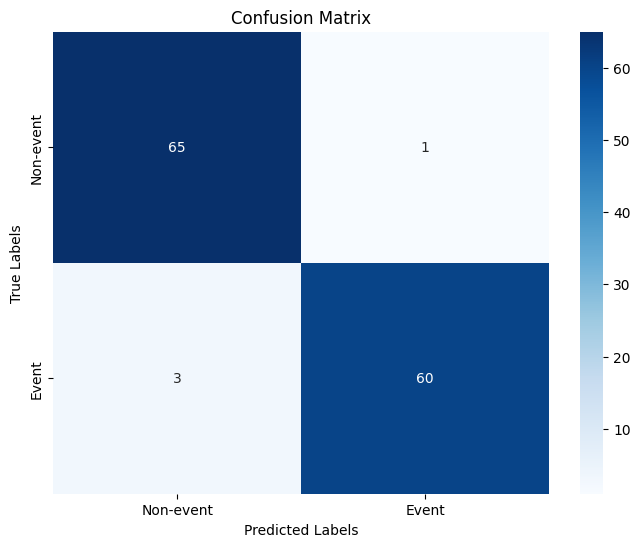

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tokenize and preprocess the evaluation dataset
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Get the predictions
# Get the predictions
eval_predictions = trainer.predict(tokenized_eval_dataset)
predicted_labels = np.argmax(eval_predictions.predictions, axis=1)
true_labels = tokenized_eval_dataset['labels']


# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-event', 'Event'], yticklabels=['Non-event', 'Event'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.9689922480620154
